<a href="https://colab.research.google.com/github/shashankag14/OpenPCDet/blob/DA-15-class-balance-imp/tb_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook fetches the TB logs from Tensorboard-Dev and recreates the plots with further smoothening.
All experiments will be present here - https://tensorboard.dev/experiments/

In [1]:

from packaging import version
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from scipy.ndimage import gaussian_filter1d
import warnings
warnings.filterwarnings('ignore')

Fetch the values of the TB logs for a particular experiment using its experiment ID in tensorboard dev.

In [2]:
experiment_id = "wTqPAlH8QyqGCNxSVTOLpQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

Save the TB log values into excel (added this for any future purpose)

In [5]:
dfw = experiment.get_scalars(pivot=False) 
root_dir = os.getcwd()
csv_path = root_dir + '/tb_experiment_1.csv'
dfw.to_csv(csv_path, index=False)
dfw_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(dfw_roundtrip, dfw)

Fetch score_fgs of each class and apply 1D gaussian smoothening
TODO : Check approrpiate sigma for smoothening

In [6]:
dfw_score_fgs_car = dfw[dfw.run.str.contains("/score_fgs/Car")]
dfw_score_fgs_car["smooth_value"] = gaussian_filter1d(dfw_score_fgs_car["value"], sigma=3)

dfw_score_fgs_ped = dfw[dfw.run.str.contains("/score_fgs/Ped")]
dfw_score_fgs_ped["smooth_value"] = gaussian_filter1d(dfw_score_fgs_ped["value"], sigma=3)

dfw_score_fgs_cyc = dfw[dfw.run.str.contains("/score_fgs/Cyclist")]
dfw_score_fgs_cyc["smooth_value"] = gaussian_filter1d(dfw_score_fgs_cyc["value"], sigma=3)

Plots
1. Car

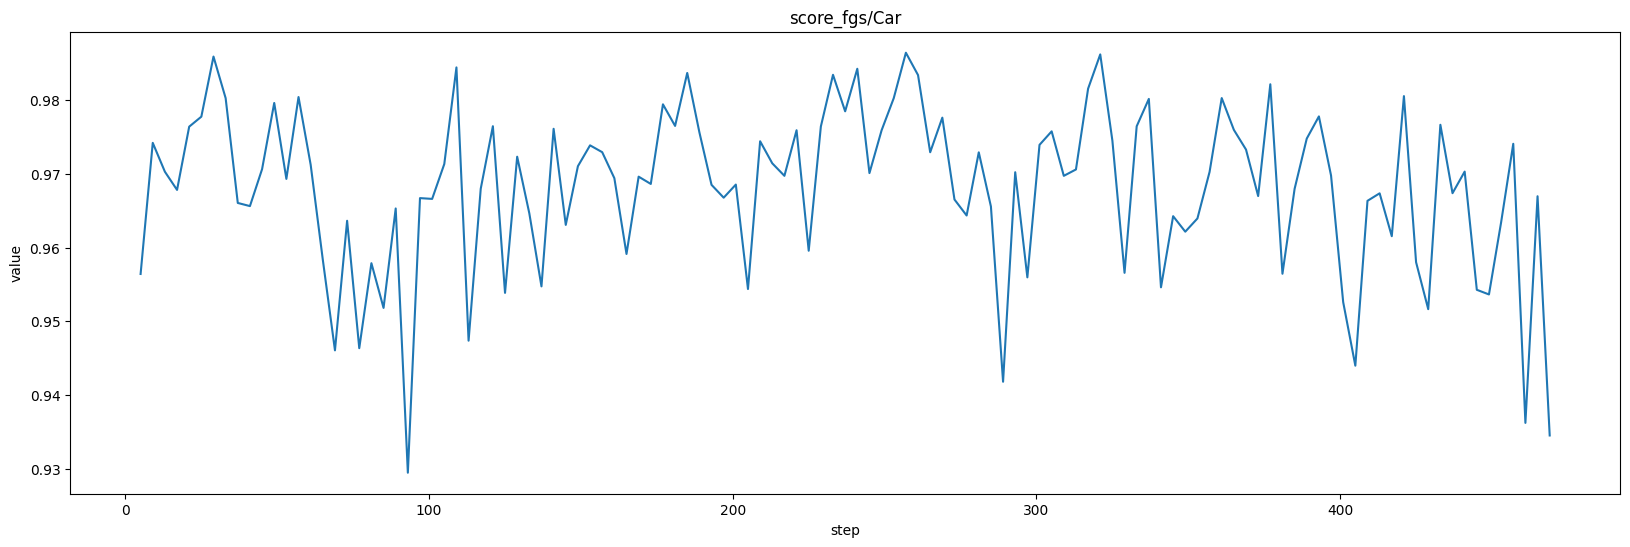

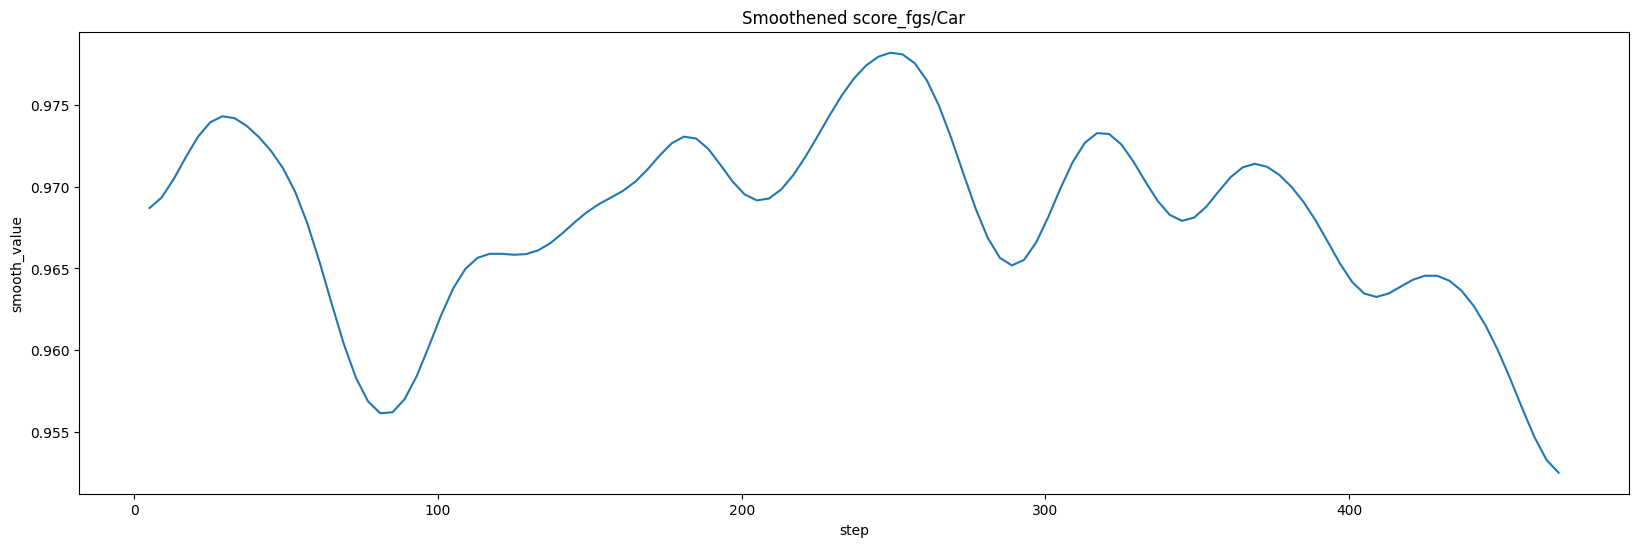

In [7]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=dfw_score_fgs_car, x="step", y="value",
             ).set_title("score_fgs/Car")

plt.figure(figsize=(20, 6))
sns.lineplot(data=dfw_score_fgs_car, x="step", y="smooth_value",
             ).set_title("Smoothened score_fgs/Car")
plt.savefig("car_smooth_score_fg")

2. Pedestrian 

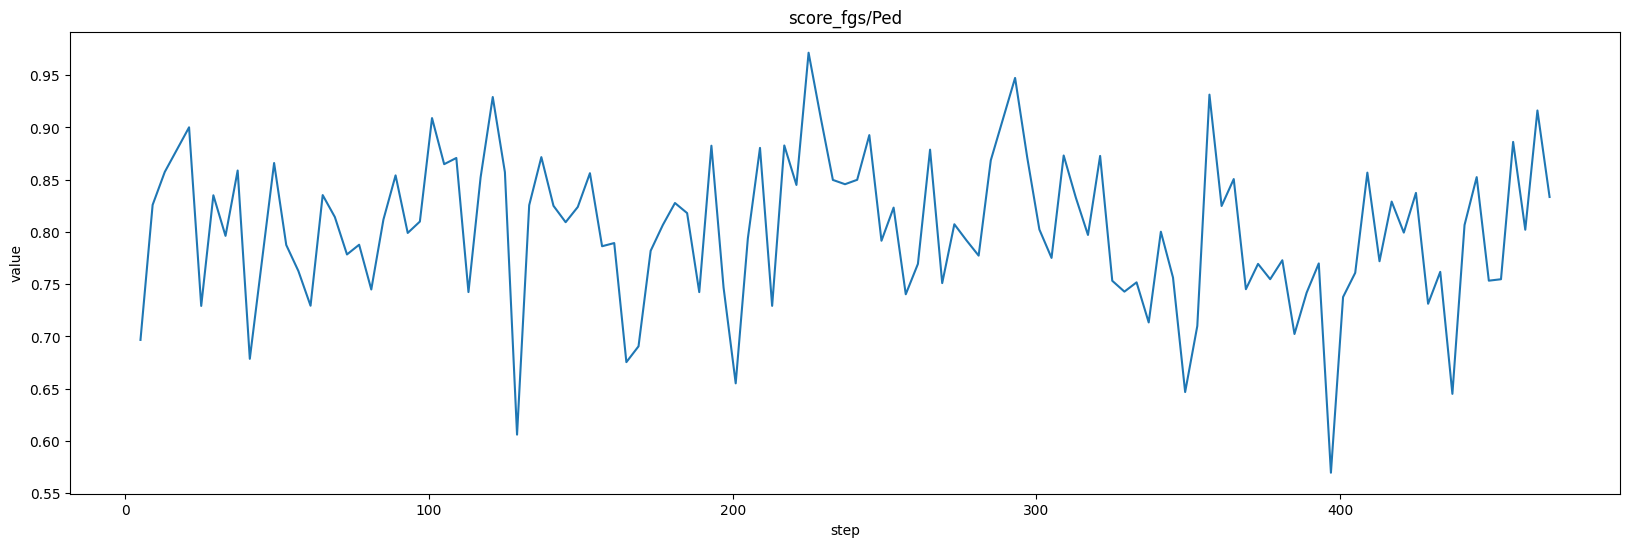

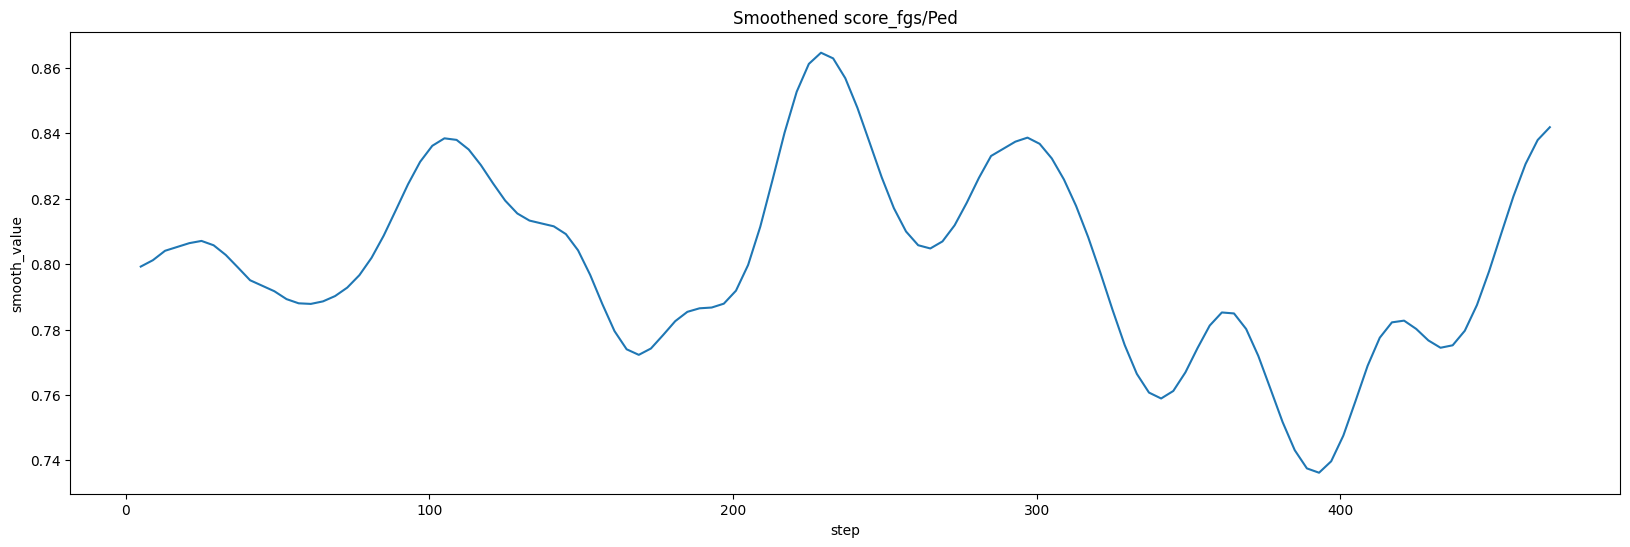

In [8]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=dfw_score_fgs_ped, x="step", y="value",
             ).set_title("score_fgs/Ped")

plt.figure(figsize=(20, 6))
sns.lineplot(data=dfw_score_fgs_ped, x="step", y="smooth_value",
             ).set_title("Smoothened score_fgs/Ped")
plt.savefig("ped_smooth_score_fg")

3. Cyclist

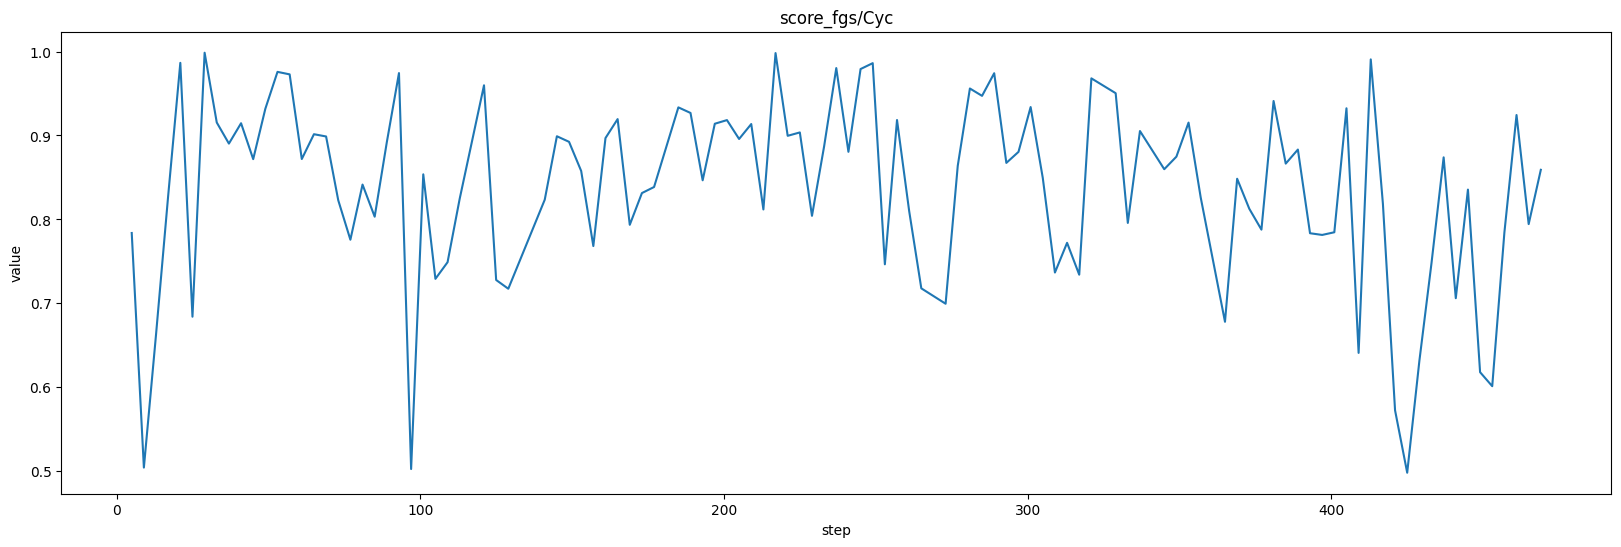

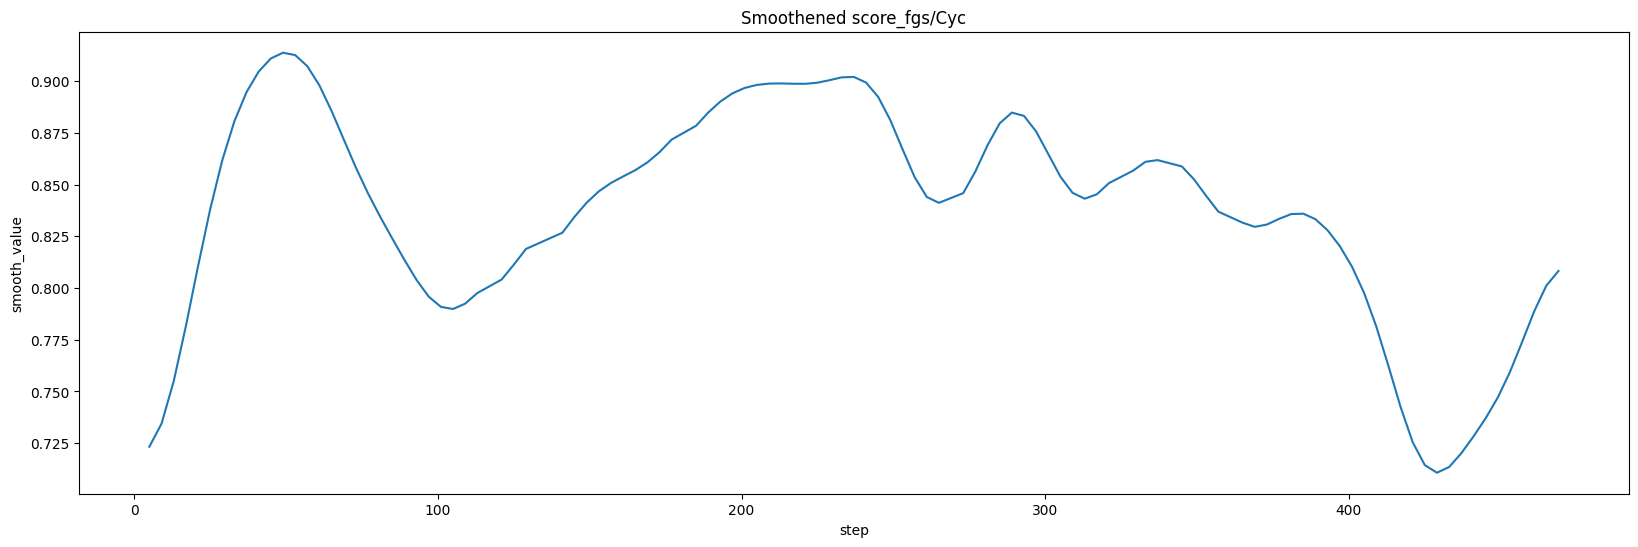

In [9]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=dfw_score_fgs_cyc, x="step", y="value",
             ).set_title("score_fgs/Cyc")

plt.figure(figsize=(20, 6))
sns.lineplot(data=dfw_score_fgs_cyc, x="step", y="smooth_value",
             ).set_title("Smoothened score_fgs/Cyc")
             
plt.savefig("cyc_smooth_score_fg")